In [38]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits

In [40]:
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits

In [43]:
from sklearn import manifold

In [44]:
data= load_digits()

In [104]:
data= digits.data
projection= manifold.TSNE().fit_transform(data)

In [105]:
projection

array([[-17.62518903,  -1.74723255],
       [ 13.21092104,   5.46254547],
       [  0.74793523,  10.60935788],
       ..., 
       [  7.67064117,   5.77014897],
       [  4.93978922, -11.18863099],
       [  6.33701831,   3.08605138]])

In [106]:
projection.T

array([[-17.62518903,  13.21092104,   0.74793523, ...,   7.67064117,
          4.93978922,   6.33701831],
       [ -1.74723255,   5.46254547,  10.60935788, ...,   5.77014897,
        -11.18863099,   3.08605138]])

In [107]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':1}

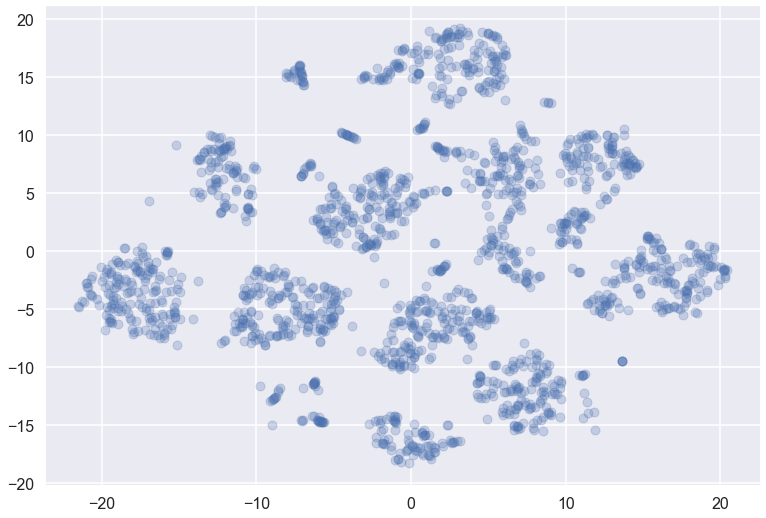

In [108]:
plt.scatter(*projection.T, **plot_kwds)

In [118]:
import hdbscan
import time

In [113]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [114]:
data = np.load('clusterable_data.npy')

In [115]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ..., 
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [116]:
data.T

array([[-0.12153499, -0.22093687,  0.1259037 , ...,  0.50243143,
         0.53822256, -0.08688887],
       [-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
         0.19412199, -0.2092721 ]])

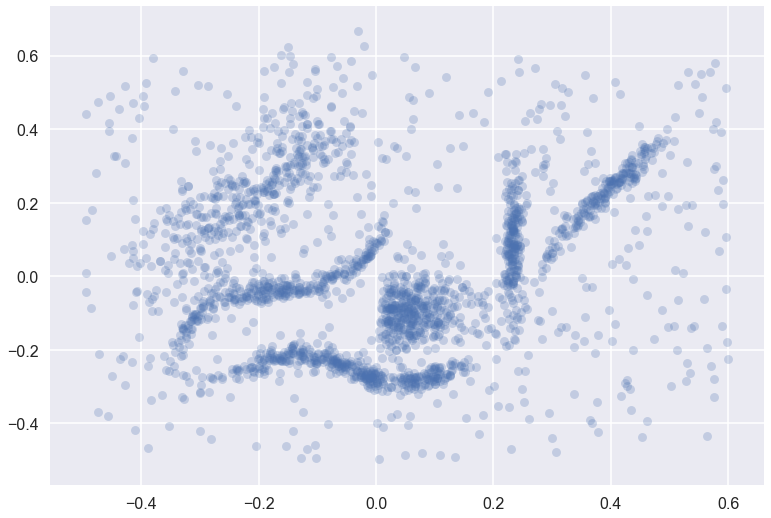

In [117]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)


# Testing the clustering algorithm

# K Means



* Normally distributed data
* Large number of samples
* Not too many clusters
* Distance can be measured in linear fashion

Ways to find Clusters.
* Graphic the variance
* Information criteria
* cross validation


In [143]:
def plot_clusters(data, algorithm, args, kwds):
    start_time=time.time()
    labels=algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette= sns.color_palette('deep',np.unique(labels).max()+1 )
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

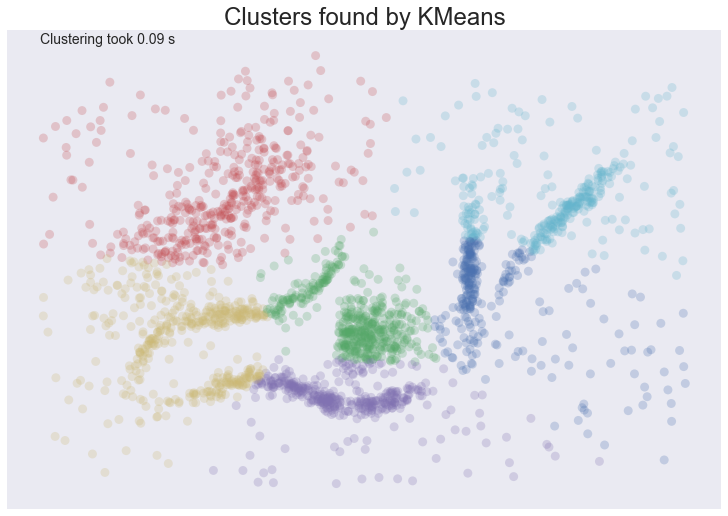

In [144]:
plot_clusters(data,KMeans, (), {'n_clusters':6})

Kmeans ignore the NOISE. It isn't a clustering algorithm, it is a partitioning algorithm. It attempt to minimize intra-partition distances. 
Need elbow curve

# Elbow curve 

In [145]:
from scipy.spatial.distance import cdist, pdist

* cdist: dist between sets of observation.
* pdist: pairwise distance between observation in the same set.

In [207]:
def eblow(df, n):
    K = range(1,20)
    kMeansVar = [KMeans(n_clusters=k).fit(df) for k in range(1, n)]
    centroids = [X.cluster_centers_ for X in kMeansVar]
    k_euclid = [cdist(df, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df)**2)/df.shape[0]
    bss = tss - wcss
    plt.figure(figsize=(10,4))
    plt.xlabel("clusters")
    plt.title("Variance explained vs K")
    plt.ylabel("perecntage of variance (%)")
    plt.plot(bss*0.4)
    plt.show()

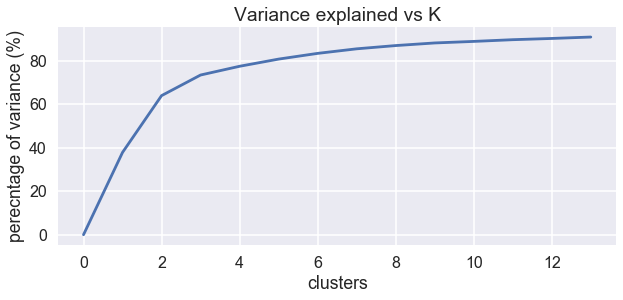

In [208]:
eblow(data,15)

In [175]:
from scipy.cluster.vq import kmeans,vq

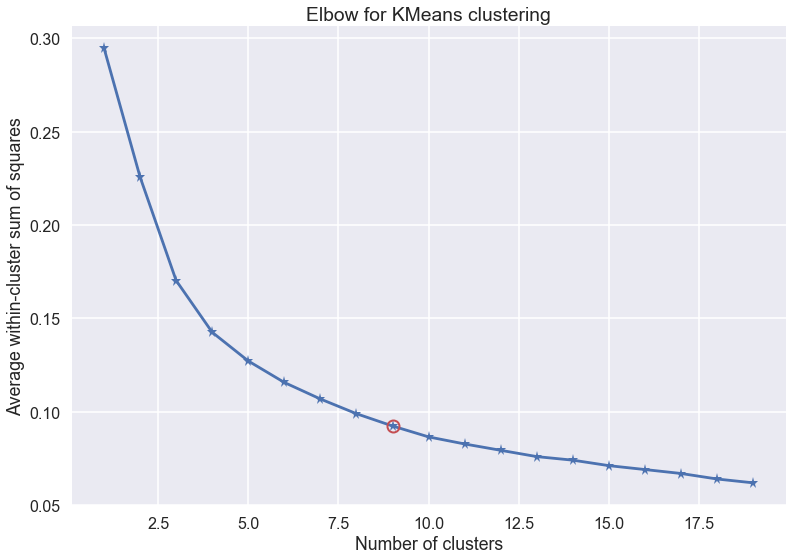

In [194]:
##### cluster data into K=1..10 clusters #####
K = range(1,20)

# scipy.cluster.vq.kmeans
KM = [kmeans(data,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.cluster.vq.vq
#Z = [vq(X,cent) for cent in centroids]
#avgWithinSS = [sum(dist)/X.shape[0] for (cIdx,dist) in Z]

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/data.shape[0] for d in dist]

##### plot ###
kIdx = 8

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None') #Marking the red circle
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

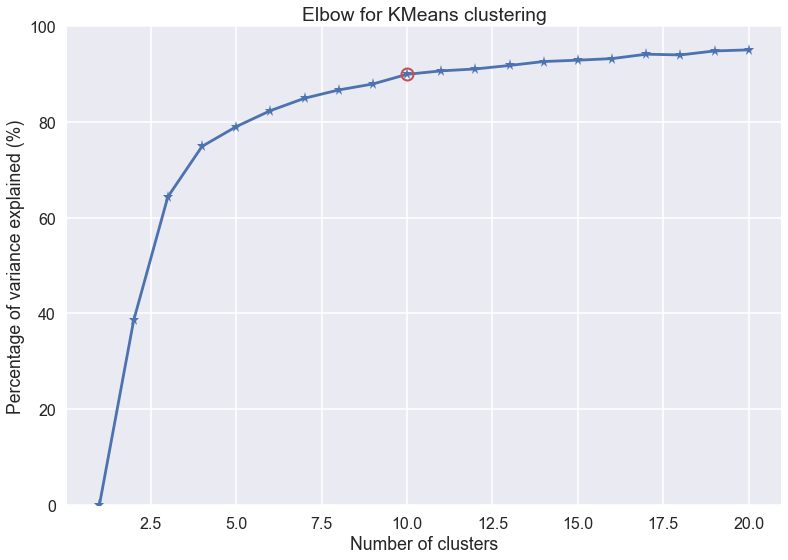

In [212]:
from matplotlib import cm
K_MAX = 20
KK = range(1,K_MAX+1)

KM = [kmeans(data,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(data)**2)/data.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 9        # K=10
clr = cm.spectral( np.linspace(0,1,10) ).tolist()
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')


In [252]:
def optimalK(data, nrefs=5, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [253]:
k, gapdf = optimalK(data, nrefs=8, maxClusters=15)
print (k)

3


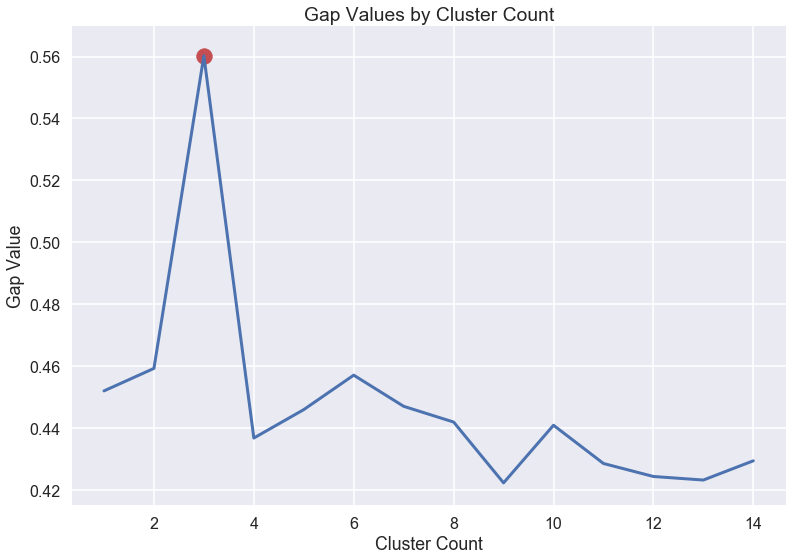

In [233]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

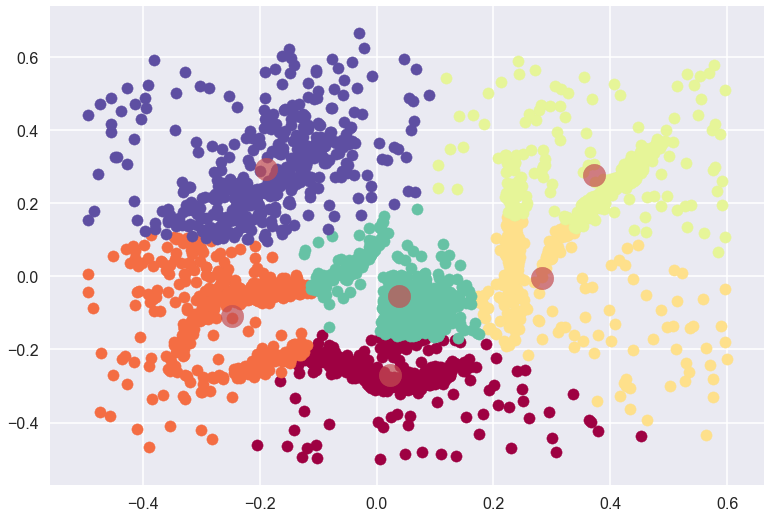

In [239]:
km = KMeans(6)
km.fit(data)

df = pd.DataFrame(data, columns=['x','y'])
df['label'] = km.labels_

colors = plt.cm.Spectral(np.linspace(0, 1, len(df.label.unique())))

for color, label in zip(colors, df.label.unique()):
    
    tempdf = df[df.label == label]
    plt.scatter(tempdf.x, tempdf.y, c=color)
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], c='r', s=500, alpha=0.7, )
plt.grid(True)
plt.show()

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in log
/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


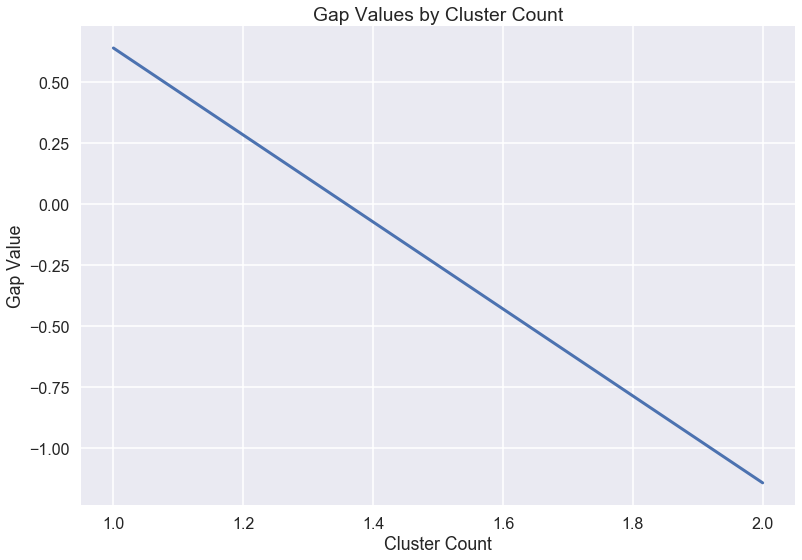

In [256]:
num, gapdf = optimalK(km.cluster_centers_, maxClusters=4)
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == num].clusterCount, gapdf[gapdf.clusterCount == num].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()